In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('../data/world_bank_data_2025.csv')
print(df.head())
print(df.info())

  country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
0        Aruba         aw  2010           2.078141       2.453597e+09   
1        Aruba         aw  2011           4.316297       2.637859e+09   
2        Aruba         aw  2012           0.627472       2.615208e+09   
3        Aruba         aw  2013          -2.372065       2.727850e+09   
4        Aruba         aw  2014           0.421441       2.790850e+09   

   GDP per Capita (Current USD)  Unemployment Rate (%)  \
0                  24093.140151                    NaN   
1                  25712.384302                    NaN   
2                  25119.665545                    NaN   
3                  25813.576727                    NaN   
4                  26129.839062                    NaN   

   Interest Rate (Real, %)  Inflation (GDP Deflator, %)  \
0                11.666131                    -1.223407   
1                 4.801974                     4.005674   
2                 8.200875         

In [20]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 country_name                          0
country_id                            0
year                                  0
Inflation (CPI %)                   778
GDP (Current USD)                   539
GDP per Capita (Current USD)        534
Unemployment Rate (%)               677
Interest Rate (Real, %)            1737
Inflation (GDP Deflator, %)         568
GDP Growth (% Annual)               560
Current Account Balance (% GDP)     909
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Gross National Income (USD)         676
Public Debt (% of GDP)             2620
dtype: int64


In [28]:
# Missing values are handled using forward and backward filling to ensure data continuity
df.sort_values(['country_name', 'year'], inplace=True)

df.ffill(inplace=True)  
df.bfill(inplace=True) 
print("Missing values after cleaning:\n", df.isna().sum())

Missing values after cleaning:
 country_name                       0
country_id                         0
year                               0
Inflation (CPI %)                  0
GDP (Current USD)                  0
GDP per Capita (Current USD)       0
Unemployment Rate (%)              0
Interest Rate (Real, %)            0
Inflation (GDP Deflator, %)        0
GDP Growth (% Annual)              0
Current Account Balance (% GDP)    0
Government Expense (% of GDP)      0
Government Revenue (% of GDP)      0
Tax Revenue (% of GDP)             0
Gross National Income (USD)        0
Public Debt (% of GDP)             0
dtype: int64


In [128]:
country_to_continent = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa', 'Democratic Republic of the Congo': 'Africa',
    'Djibouti': 'Africa', 'Egypt': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Ghana': 'Africa', 'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa', 'Ivory Coast': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Libya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Sao Tome and Principe': 'Africa', 'Senegal': 'Africa',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa',
    'South Sudan': 'Africa', 'Sudan': 'Africa', 'Tanzania': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa',
    'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Bhutan': 'Asia', 'Brunei': 'Asia', 'Cambodia': 'Asia', 'China': 'Asia', 'Cyprus': 'Asia', 'Georgia': 'Asia',
    'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia',
    'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia', 'North Korea': 'Asia',
    'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia', 'Philippines': 'Asia', 'Qatar': 'Asia', 'Russia': 'Asia',
    'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Armenia': 'Europe', 'Austria': 'Europe', 'Azerbaijan': 'Europe',
    'Belarus': 'Europe', 'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Georgia': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe', 'Kosovo': 'Europe',
    'Latvia': 'Europe', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe',
    'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe', 'Netherlands': 'Europe', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe',
    'San Marino': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Ukraine': 'Europe', 'United Kingdom': 'Europe', 'Vatican City': 'Europe',

    # North America
    'Antigua and Barbuda': 'North America', 'Bahamas': 'North America', 'Barbados': 'North America',
    'Belize': 'North America', 'Canada': 'North America', 'Costa Rica': 'North America', 'Cuba': 'North America',
    'Dominica': 'North America', 'Dominican Republic': 'North America', 'El Salvador': 'North America',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Haiti': 'North America', 'Honduras': 'North America',
    'Jamaica': 'North America', 'Mexico': 'North America', 'Nicaragua': 'North America', 'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America', 'Saint Vincent and the Grenadines': 'North America',
    'Trinidad and Tobago': 'North America', 'United States': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America', 'Chile': 'South America',
    'Colombia': 'South America', 'Ecuador': 'South America', 'Guyana': 'South America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Suriname': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'Kiribati': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania', 'Nauru': 'Oceania', 'New Zealand': 'Oceania', 'Palau': 'Oceania',
    'Papua New Guinea': 'Oceania', 'Samoa': 'Oceania', 'Solomon Islands': 'Oceania', 'Tonga': 'Oceania',
    'Tuvalu': 'Oceania', 'Vanuatu': 'Oceania'
}


df['continent'] = df['country_name'].map(country_to_continent)


In [130]:
print(df[['country_name', 'continent']].head())


   country_name continent
16  Afghanistan      Asia
17  Afghanistan      Asia
18  Afghanistan      Asia
19  Afghanistan      Asia
20  Afghanistan      Asia


In [30]:
# The top 10 countries by GDP in 2023 are identified
df[df['year'] == 2023].nlargest(10, 'GDP (Current USD)')[['country_name', 'GDP (Current USD)']]

,country_name,GDP (Current USD)
3261,United States,2.772071e+13
589,China,1.779478e+13
813,Germany,4.525704e+12
1581,Japan,4.204495e+12
1437,India,3.567552e+12
1101,United Kingdom,3.380855e+12
1037,France,3.051832e+12
1533,Italy,2.300941e+12
429,Brazil,2.173666e+12
3325,British Virgin Islands,2.173666e+12


In [32]:
# The 10 countries with the lowest unemployment rates in 2024 are identified
df[df['year'] == 2024].nsmallest(10, 'Unemployment Rate (%)')[['country_name', 'Unemployment Rate (%)']]

,country_name,Unemployment Rate (%)
2622,Qatar,0.126
1646,Cambodia,0.270
2270,Niger,0.355
3054,Thailand,0.693
222,Burundi,0.902
3022,Chad,1.088
318,Bahrain,1.102
1726,Lao PDR,1.218
3358,Viet Nam,1.431
1966,Moldova,1.434


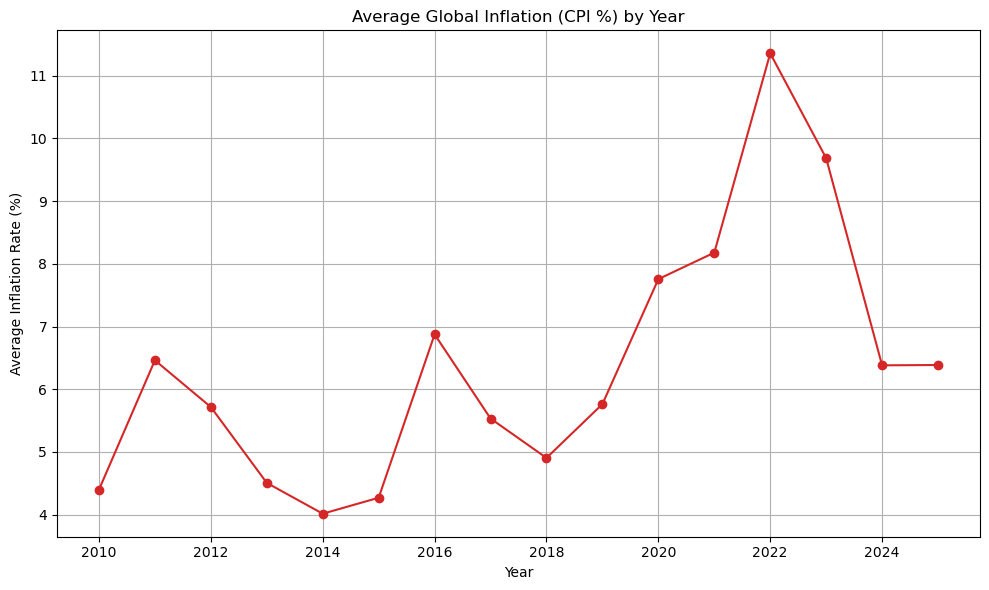

In [38]:
# The global average inflation rate (CPI) is calculated for each year
df.groupby('year')['Inflation (CPI %)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(inflation_by_year.index, inflation_by_year.values, marker='o', linestyle='-', color='tab:red')
plt.title('Average Global Inflation (CPI %) by Year')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# The country with the highest annual economic growth is identified for each year
df.loc[df.groupby('year')['GDP Growth (% Annual)'].idxmax()][['year', 'country_name', 'GDP Growth (% Annual)']]

,year,country_name,GDP Growth (% Annual)
1888,2010,"Macao SAR, China",25.122809
1889,2011,"Macao SAR, China",21.616690
1762,2012,Libya,86.826748
2755,2013,Sierra Leone,21.079014
2356,2014,Nauru,16.423336
1445,2015,Ireland,24.615570
2134,2016,Northern Mariana Islands,29.212121
1767,2017,Libya,32.491802
1800,2018,Liechtenstein,10.155818
3097,2019,Timor-Leste,24.212884


In [42]:
# Inflation trends over time are analyzed for a specific country (Ireland)
df[df['country_name'] == 'Ireland'][['year', 'Inflation (CPI %)']]

,year,Inflation (CPI %)
1440,2010,-0.918389
1441,2011,2.548978
1442,2012,1.694741
1443,2013,0.515099
1444,2014,0.190916
1445,2015,-0.330960
1446,2016,0.020125
1447,2017,0.362173
1448,2018,0.471131
1449,2019,0.937843


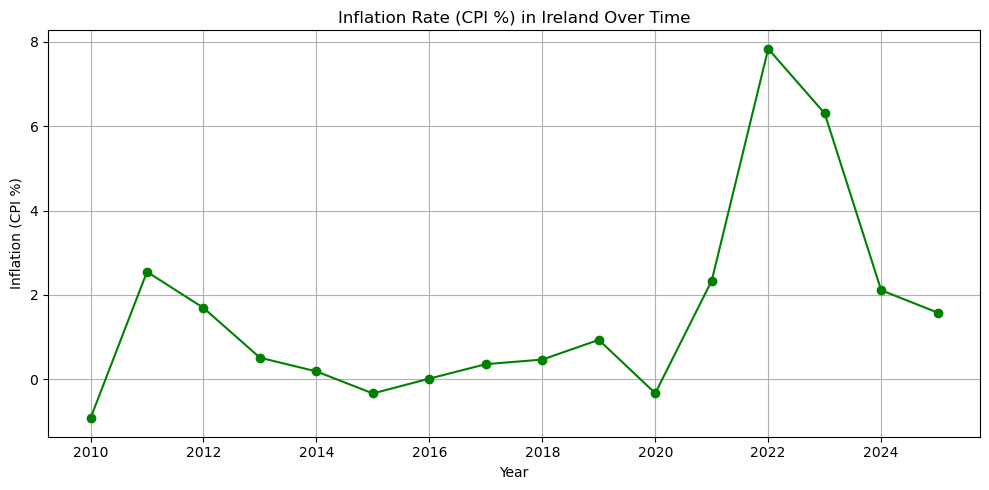

In [56]:
#matplotlib
ireland_inflation = df[df['country_name'] == 'Ireland'][['year', 'Inflation (CPI %)']]

plt.figure(figsize=(10, 5))
plt.plot(ireland_inflation['year'], ireland_inflation['Inflation (CPI %)'], marker='o', linestyle='-', color='green')
plt.title('Inflation Rate (CPI %) in Ireland Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation (CPI %)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# GDP growth is compared across selected countries
df[df['country_name'].isin(['United States', 'China', 'India'])][['year', 'country_name', 'GDP Growth (% Annual)']]

,year,country_name,GDP Growth (% Annual)
576,2010,China,10.635871
577,2011,China,9.550832
578,2012,China,7.863736
579,2013,China,7.766150
580,2014,China,7.425764
581,2015,China,7.041329
582,2016,China,6.848762
583,2017,China,6.947201
584,2018,China,6.749774
585,2019,China,5.950501


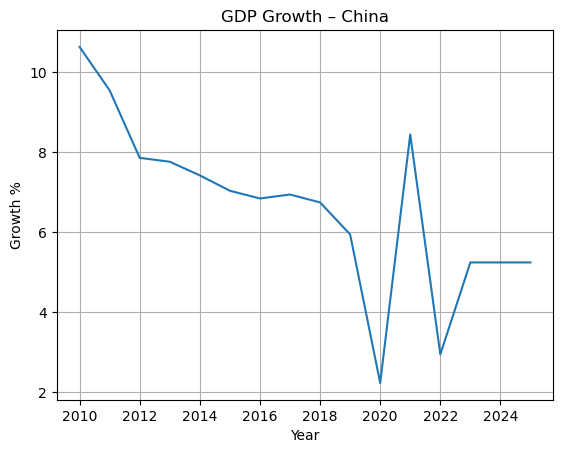

In [50]:
# China's GDP growth over time is visualized using a line chart
china = df[df['country_name'] == 'China']
plt.plot(china['year'], china['GDP Growth (% Annual)'])
plt.title('GDP Growth – China')
plt.xlabel('Year')
plt.ylabel('Growth %')
plt.grid()
plt.show()

In [60]:
# The top 20 countries with the highest public debt as a percentage of GDP are identified
df[df['year'] == 2023].nlargest(20, 'Public Debt (% of GDP)')[['country_name', 'Public Debt (% of GDP)']]

,country_name,Public Debt (% of GDP)
1581,Japan,216.213375
1229,Greece,190.608142
1261,Greenland,190.608142
1245,Grenada,190.608142
1293,Guam,190.608142
2733,Singapore,177.001670
2957,Sint Maarten (Dutch part),177.001670
1101,United Kingdom,138.193490
445,Barbados,133.202198
3261,United States,114.755553


In [64]:
# The 20 countries with the lowest public debt as a percentage of GDP are identified
df[df['year'] == 2023].nsmallest(20, 'Public Debt (% of GDP)')[['country_name', 'Public Debt (% of GDP)']]

,country_name,Public Debt (% of GDP)
93,United Arab Emirates,1.845685
1837,Lesotho,2.992717
2749,Solomon Islands,15.393166
2813,Somalia,15.393166
637,"Congo, Dem. Rep.",15.989697
205,Azerbaijan,16.822427
2653,Russian Federation,18.961672
2669,Rwanda,18.961672
3389,Samoa,18.961672
493,Botswana,19.616081


In [66]:
# Changes in GDP per capita over time are analyzed for Germany
df[df['country_name'] == 'Germany'][['year', 'GDP per Capita (Current USD)']]

,year,GDP per Capita (Current USD)
800,2010,42409.935699
801,2011,47646.582043
802,2012,44735.588232
803,2013,47220.010210
804,2014,48971.082472
805,2015,41911.010985
806,2016,42961.035691
807,2017,45526.599958
808,2018,48874.859503
809,2019,47623.865607


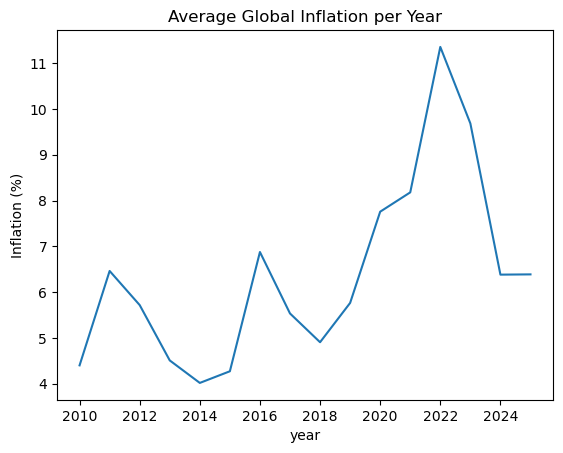

In [68]:
#Average Global Inflation per Year
df.groupby('year')['Inflation (CPI %)'].mean().plot(kind='line', title='Average Global Inflation per Year')
plt.ylabel('Inflation (%)')
plt.show()

In [78]:
# The 10 countries that experienced the highest inflation (CPI) in 2023 are identified
df[df['year'] == 2023].nlargest(10, 'Inflation (CPI %)')[['country_name', 'Inflation (CPI %)']]

,country_name,Inflation (CPI %)
1741,Lebanon,221.341644
3469,Zimbabwe,79.611351
3309,"Venezuela, RB",79.263053
2701,Sudan,75.578432
3165,Turkiye,53.859409
2877,Suriname,51.587316
2765,Sierra Leone,47.642873
1469,"Iran, Islamic Rep.",44.579186
1133,Ghana,38.106966
1373,Haiti,36.813516


In [80]:
# The countries with the worst economic performance in 2023 are identified
df[df['year'] == 2023].nsmallest(10, 'GDP Growth (% Annual)')[['country_name', 'GDP Growth (% Annual)']]

,country_name,GDP Growth (% Annual)
2701,Sudan,-20.111576
3101,Timor-Leste,-18.117813
2845,South Sudan,-10.793365
1453,Ireland,-5.530007
2589,West Bank and Gaza,-5.410937
1213,Equatorial Guinea,-5.089309
2029,Marshall Islands,-3.934871
3309,"Venezuela, RB",-3.894386
1709,Kuwait,-3.640426
973,Estonia,-3.023036


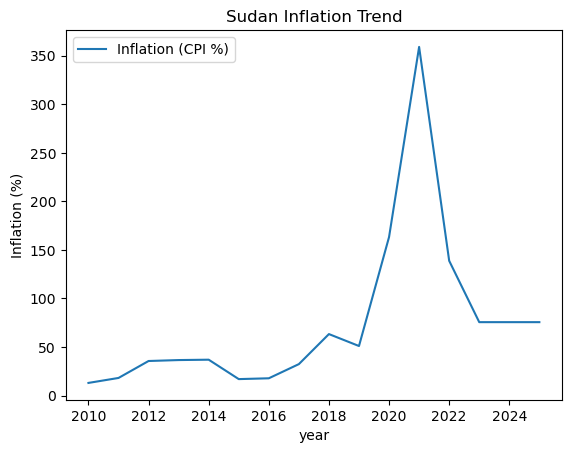

In [84]:
# The change in inflation in Sudan over the years is visualized using a line chart
df[df['country_name'] == 'Sudan'].plot(x='year', y='Inflation (CPI %)', kind='line', title='Sudan Inflation Trend')
plt.ylabel('Inflation (%)')
plt.show()

In [88]:
# The average inflation rate in 2010 and 2023 is calculated for all countries in the dataset
df[df['year'].isin([2010, 2023])].groupby('year')['Inflation (CPI %)'].mean()

year
2010    4.398032
2023    9.684955
Name: Inflation (CPI %), dtype: float64

In [94]:
# The 20 countries with the highest government spending as a percentage of GDP in 2023 are identified
df[df['year'] == 2023].nlargest(20, 'Government Expense (% of GDP)')[['country_name', 'Government Expense (% of GDP)']]

,country_name,Government Expense (% of GDP)
2365,Nauru,103.725787
1661,Kiribati,87.412005
2541,"Korea, Dem. People's Rep.",87.412005
3229,Ukraine,66.463888
2029,Marshall Islands,59.443177
2173,Mauritania,59.443177
2477,Palau,58.953595
3101,Timor-Leste,52.493598
1533,Italy,47.604903
1037,France,47.326465


In [102]:
# Japan's inflation rates for the years 2010, 2020, and 2023 are examined to assess changes before and after the COVID-19
df[(df['country_name'] == 'Japan') & (df['year'].isin([2010, 2020, 2023]))][['year', 'Inflation (CPI %)']]

,year,Inflation (CPI %)
1568,2010,-0.728243
1578,2020,-0.024996
1581,2023,3.268134


In [106]:
# The top 20 countries with the highest tax revenue as a percentage of GDP in 2025 are identified
df[df['year'] == 2025].nlargest(20, 'Tax Revenue (% of GDP)')[['country_name', 'Tax Revenue (% of GDP)']]

,country_name,Tax Revenue (% of GDP)
2367,Nauru,44.402265
863,Denmark,31.404169
831,Djibouti,31.404169
847,Dominica,31.404169
1839,Lesotho,30.442549
2383,New Zealand,29.933857
1871,Luxembourg,27.796776
2927,Sweden,27.604753
1103,United Kingdom,27.318863
2239,Namibia,27.171548


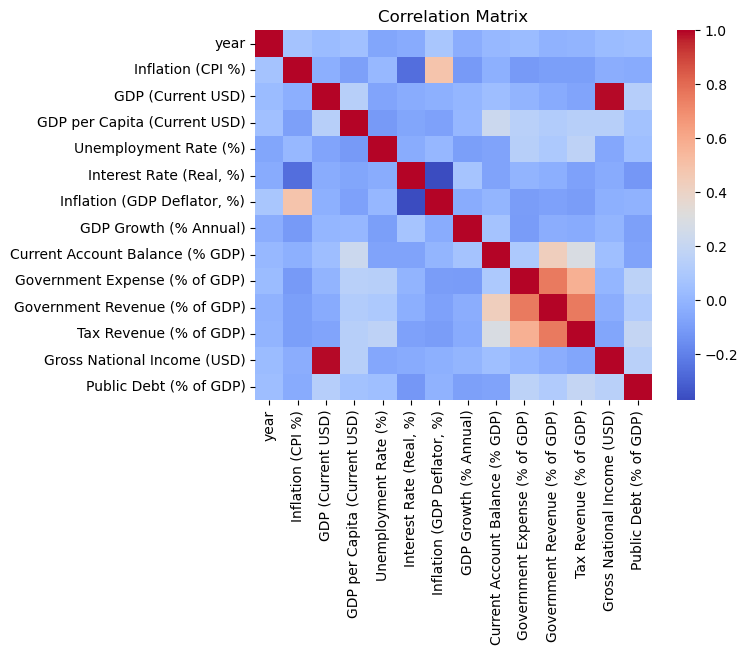

In [154]:
# A heatmap of correlations between all numerical variables in the dataset is generated
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

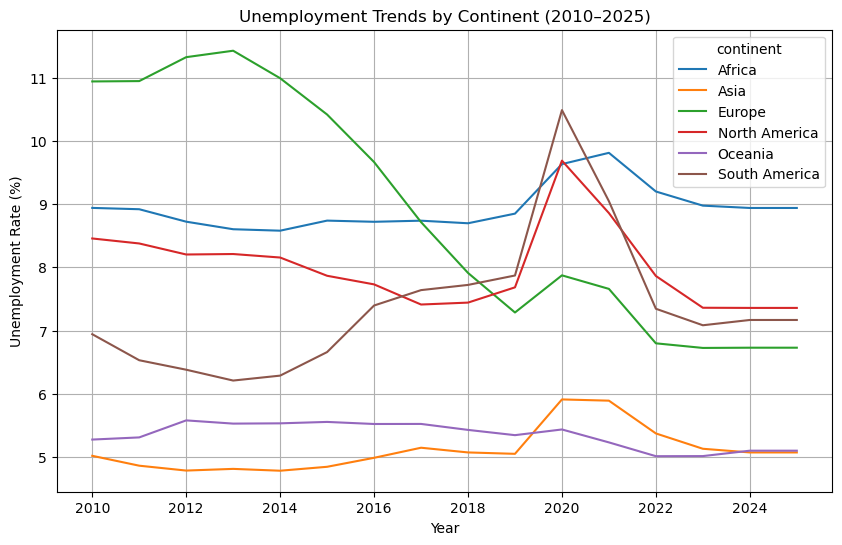

In [142]:
# Unemployment Trends by Continent (2010–2025)
# Changes in unemployment rates across continents over the years are analyzed

df_clean.groupby(['continent', 'year'])['Unemployment Rate (%)'].mean().unstack().T.plot(figsize=(10,6))
plt.title('Unemployment Trends by Continent (2010–2025)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


In [144]:
variation = df_clean.groupby('continent')['Unemployment Rate (%)'].agg(lambda x: x.max() - x.min())
print(variation.sort_values(ascending=False))


continent
Africa           35.043
Europe           32.350
North America    24.345
Asia             19.737
Oceania          18.454
South America    13.962
Name: Unemployment Rate (%), dtype: float64


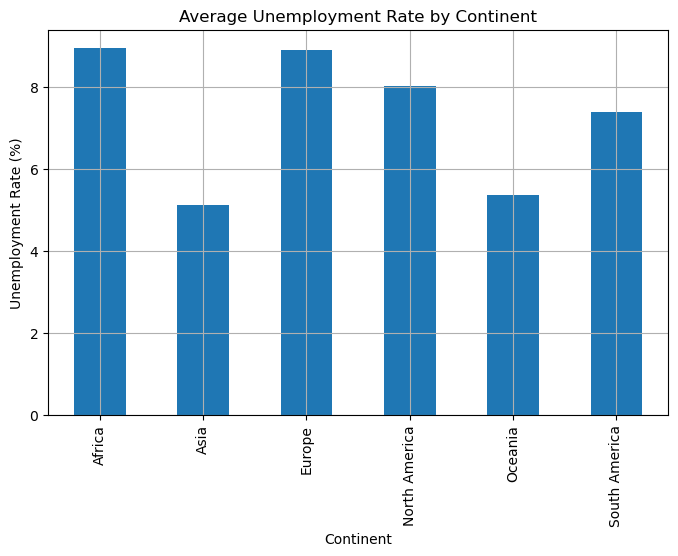

In [136]:
#Average Unemployment Rate by Continent
avg_unemployment_by_continent.plot(kind='bar', title='Average Unemployment Rate by Continent', figsize=(8, 5))
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Continent')
plt.grid(True)
plt.show()

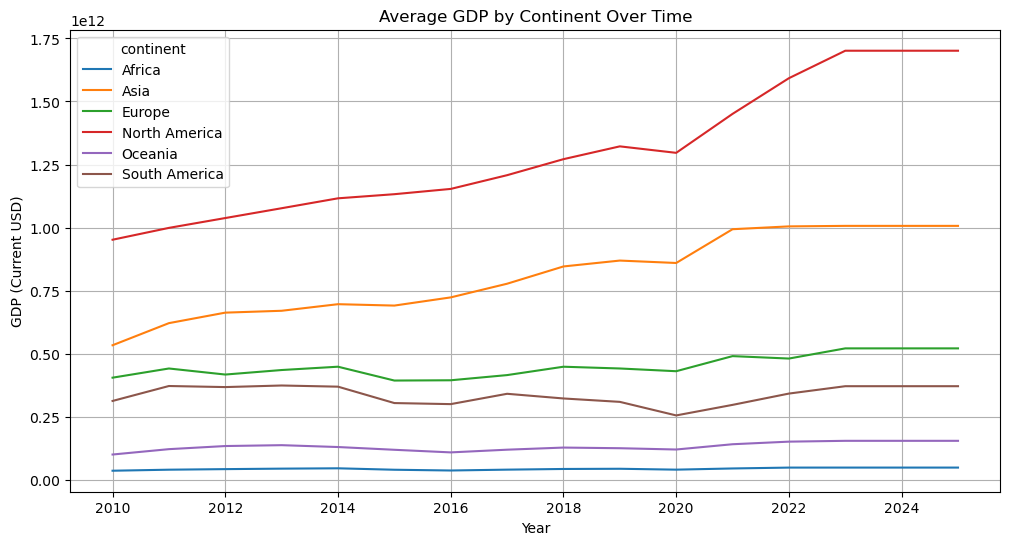

In [150]:
# The evolution of average GDP by continent is analyzed over time
gdp_trend = df_clean.groupby(['continent', 'year'])['GDP (Current USD)'].mean().unstack()
gdp_trend.T.plot(figsize=(12, 6), title='Average GDP by Continent Over Time')
plt.ylabel('GDP (Current USD)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


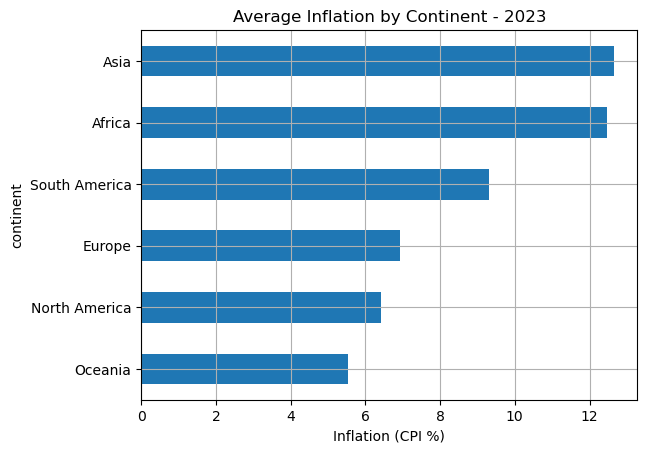

In [148]:
# Inflation rates are compared across continents for a specific year (2023)
df_2023 = df_clean[df_clean['year'] == 2023]
df_2023.groupby('continent')['Inflation (CPI %)'].mean().sort_values().plot(kind='barh', title='Average Inflation by Continent - 2023')
plt.xlabel('Inflation (CPI %)')
plt.grid(True)
plt.show()


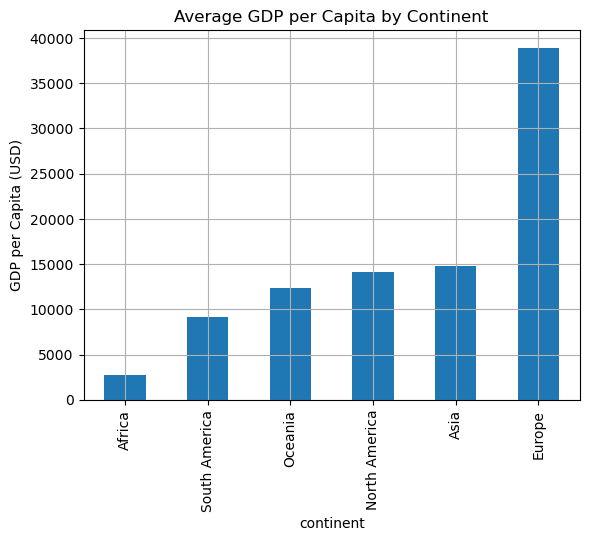

In [158]:
# GDP per capita is compared across different continents
df_clean.groupby('continent')['GDP per Capita (Current USD)'].mean().sort_values().plot(kind='bar', title='Average GDP per Capita by Continent')
plt.ylabel('GDP per Capita (USD)')
plt.grid(True)
plt.show()


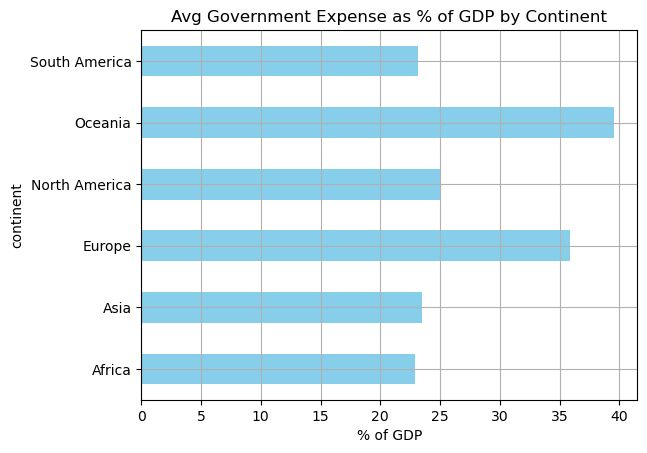

In [160]:
# Government spending as a percentage of GDP is analyzed across continents
df_clean.groupby('continent')['Government Expense (% of GDP)'].mean().plot(kind='barh', color='skyblue')
plt.title('Avg Government Expense as % of GDP by Continent')
plt.xlabel('% of GDP')
plt.grid(True)
plt.show()


In [174]:
# Countries with the highest and lowest unemployment rates within each continent in 2023 are identified
for cont in df_clean['continent'].unique():
    top = df_clean[(df_clean['continent'] == cont) & (df_clean['year'] == 2023)]
    top_sorted = top.sort_values(by='Unemployment Rate (%)', ascending=False)
    print("\n{cont} - Highest Unemployment:\n", top_sorted[['country_name', 'Unemployment Rate (%)']].head(3))
    print("\n{cont} - Lowest Unemployment:\n", top_sorted[['country_name', 'Unemployment Rate (%)']].tail(3))


{cont} - Highest Unemployment:
      country_name  Unemployment Rate (%)
1565       Jordan                 17.969
1485         Iraq                 15.447
29    Afghanistan                 13.991

{cont} - Lowest Unemployment:
      country_name  Unemployment Rate (%)
3053     Thailand                  0.733
1645     Cambodia                  0.225
2621        Qatar                  0.130

{cont} - Highest Unemployment:
        country_name  Unemployment Rate (%)
1805  Liechtenstein                 18.615
2109     Montenegro                 14.621
125         Armenia                 13.245

{cont} - Lowest Unemployment:
      country_name  Unemployment Rate (%)
3405       Kosovo                  2.604
1965      Moldova                  1.555
1949       Monaco                  1.434

{cont} - Highest Unemployment:
       country_name  Unemployment Rate (%)
2941      Eswatini                 35.086
3437  South Africa                 32.098
829       Djibouti                 26.154

{con

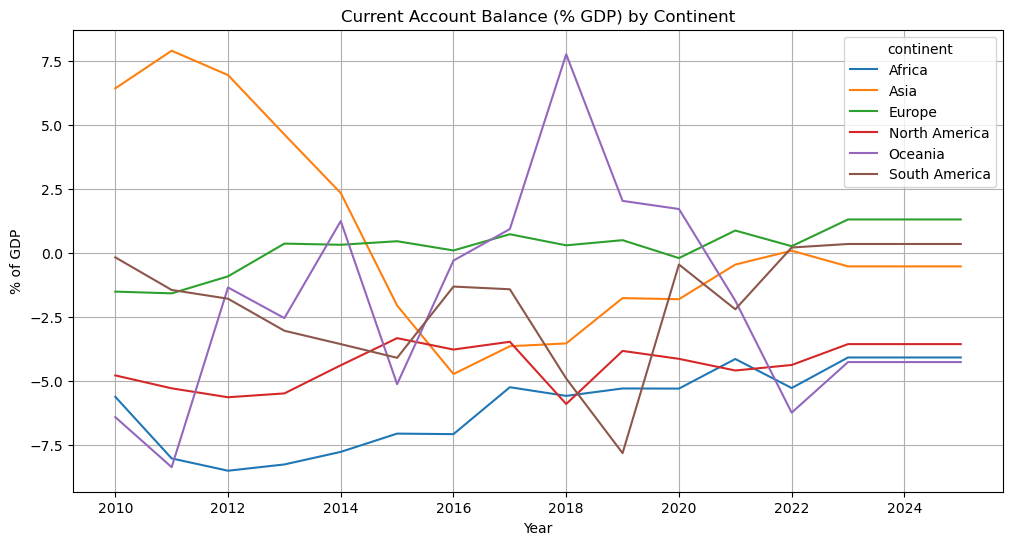

In [178]:
# The evolution of current account surplus/deficit as a percentage of GDP is analyzed for each continent
balance = df_clean.groupby(['continent', 'year'])['Current Account Balance (% GDP)'].mean().unstack()
balance.T.plot(figsize=(12, 6), title='Current Account Balance (% GDP) by Continent')
plt.ylabel('% of GDP')
plt.xlabel('Year')
plt.grid(True)
plt.show()


In [176]:
# The most indebted countries in each continent for the latest available year are identified
latest_year = df_clean['year'].max()
df_latest = df_clean[df_clean['year'] == latest_year]
for cont in df_latest['continent'].unique():
    sub = df_latest[df_latest['continent'] == cont]
    top_debt = sub.sort_values(by='Public Debt (% of GDP)', ascending=False).head(3)
    print("\n{cont} - Highest Public Debt in {latest_year}:\n", top_debt[['country_name', 'Public Debt (% of GDP)']])



{cont} - Highest Public Debt in {latest_year}:
      country_name  Public Debt (% of GDP)
1583        Japan              216.213375
2735    Singapore              177.001670
287    Bangladesh              111.598089

{cont} - Highest Public Debt in {latest_year}:
         country_name  Public Debt (% of GDP)
1231          Greece              190.608142
1103  United Kingdom              138.193490
959            Spain              107.259969

{cont} - Highest Public Debt in {latest_year}:
       country_name  Public Debt (% of GDP)
2767  Sierra Leone              103.153573
2975    Seychelles              103.153573
2719       Senegal              103.153573

{cont} - Highest Public Debt in {latest_year}:
        country_name  Public Debt (% of GDP)
1247        Grenada              190.608142
447        Barbados              133.202198
3263  United States              114.755553

{cont} - Highest Public Debt in {latest_year}:
     country_name  Public Debt (% of GDP)
415      Bolivia  

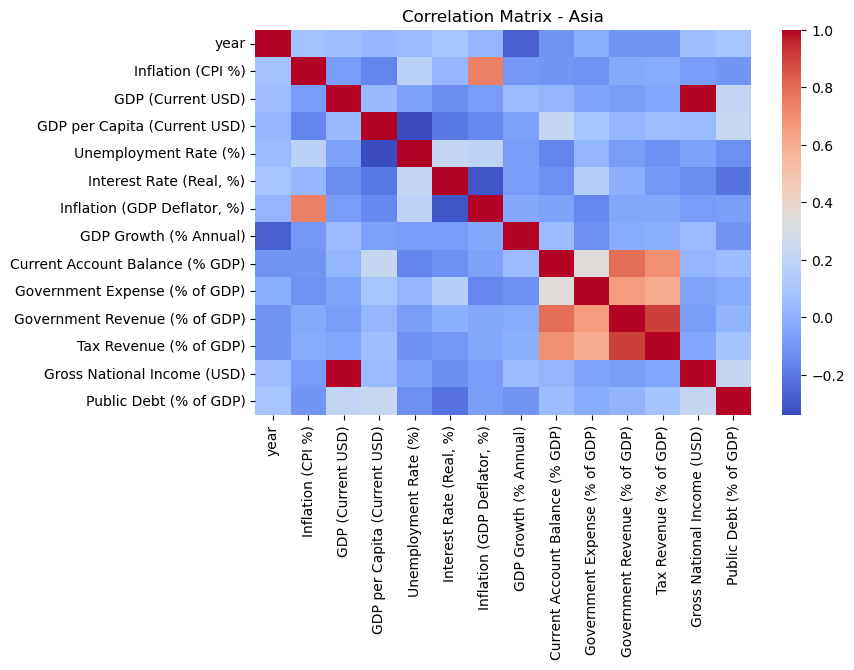

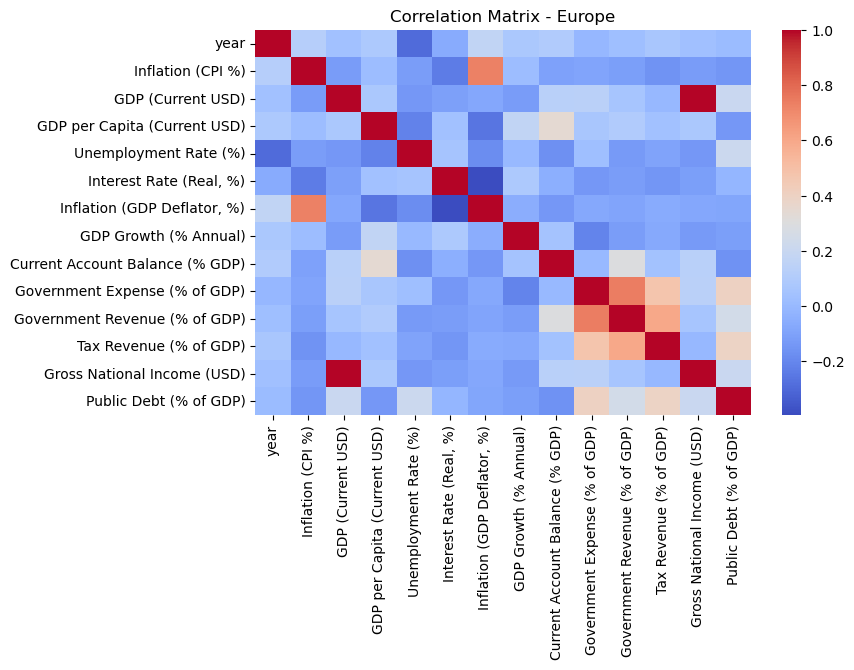

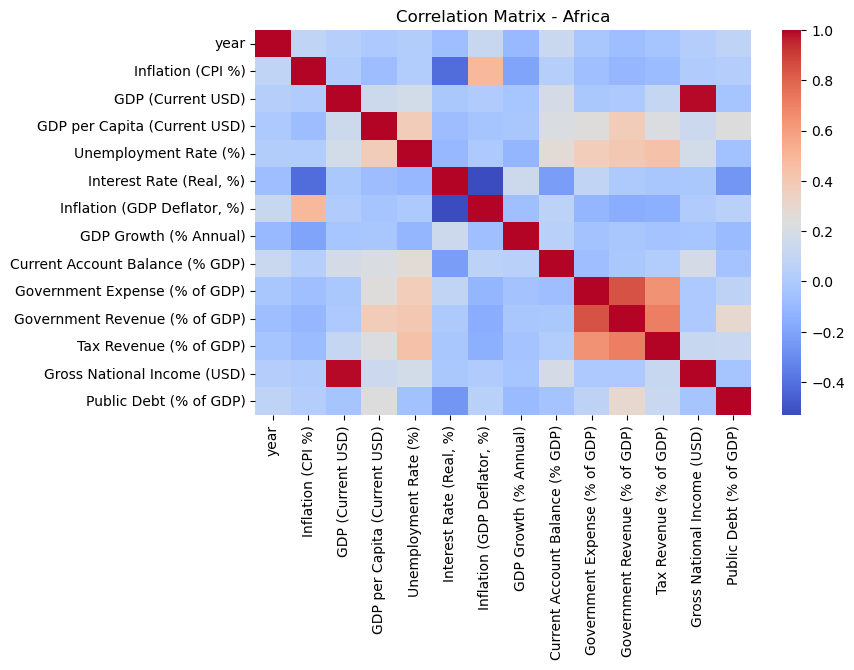

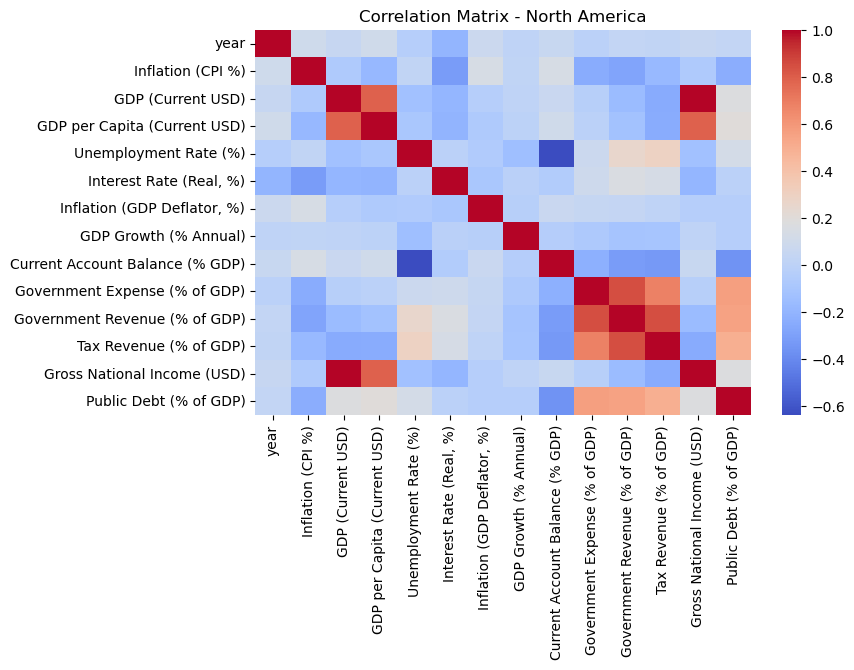

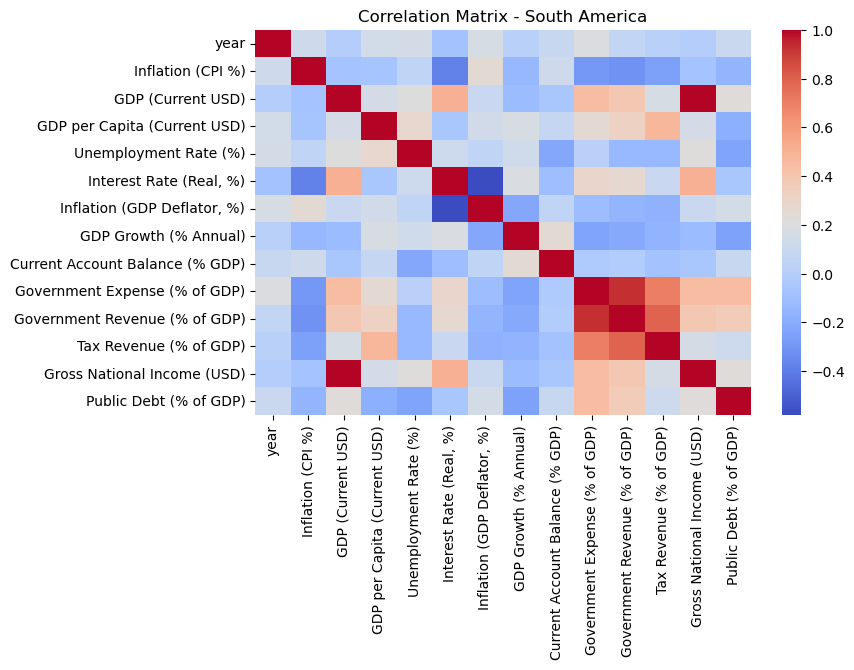

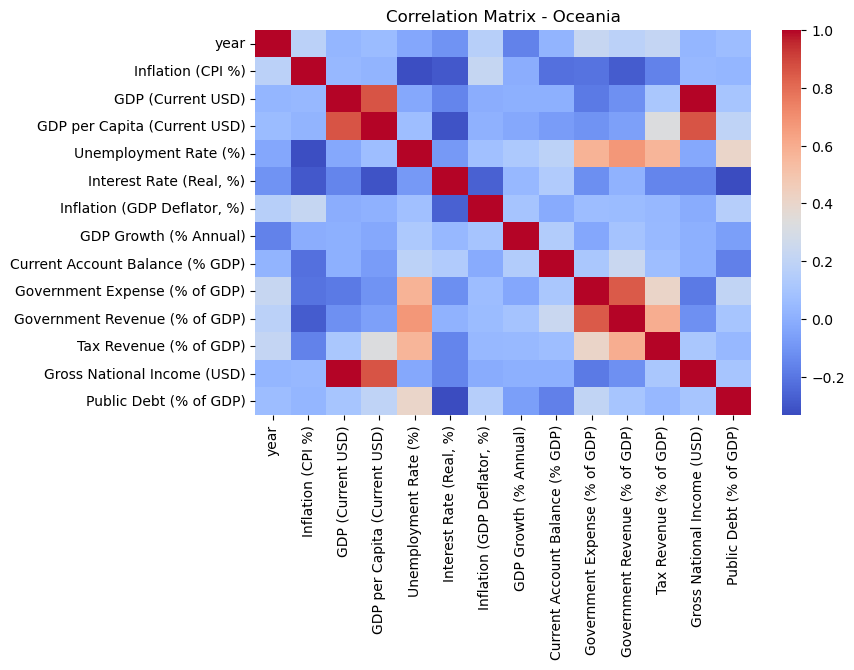

In [156]:
# A heatmap of correlations between indicators within each continent is generated
for cont in df_clean['continent'].unique():
    subset = df_clean[df_clean['continent'] == cont].select_dtypes('number')
    plt.figure(figsize=(8, 5))
    sns.heatmap(subset.corr(), annot=False, cmap='coolwarm')
    plt.title(f'Correlation Matrix - {cont}')
    plt.show()
